# Unsupervised Learning for Flood Data Analysis (Beginner Friendly)

This notebook demonstrates an unsupervised learning approach to analyze patterns in our flood-related data. Instead of predicting flood probability directly, we'll look for natural groupings in our data that might reveal different types of flood-prone areas.

In [1]:
# First, we import the tools we need
import pandas as pd  # For handling our data
import numpy as np  # For numerical operations
from sklearn.preprocessing import StandardScaler  # To standardize our data
from sklearn.cluster import KMeans  # For clustering our data
from sklearn.decomposition import PCA  # For reducing the dimensionality of our data
import matplotlib.pyplot as plt  # For making charts
import seaborn as sns  # For prettier charts

# We set a random seed to make our results reproducible
np.random.seed(42)

## Step 1: Loading and Preparing Our Data

We'll start by loading our data and preparing it for analysis.

In [2]:
# Load the data from our CSV file
data = pd.read_csv('flood_kaggle.csv')

# In unsupervised learning, we don't use the target variable (FloodProbability)
# We're looking for patterns in the data without using this information
X = data.drop('FloodProbability', axis=1)

# We need to standardize our features
# This ensures all our features are on the same scale, which is important for many unsupervised learning methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data prepared for unsupervised learning")
print(f"We're analyzing {X.shape[1]} features for {X.shape[0]} different locations or scenarios")

# By standardizing, we're making sure that factors measured in different units (like rainfall in mm and elevation in meters)
# can be compared fairly. This helps us find meaningful patterns across all our flood-related factors.

Data prepared for unsupervised learning
We're analyzing 20 features for 50000 different locations or scenarios


## Step 2: Reducing Data Complexity with PCA

We have many features, which can be hard to visualize. We'll use a technique called PCA to reduce our data to 2 dimensions so we can plot it.

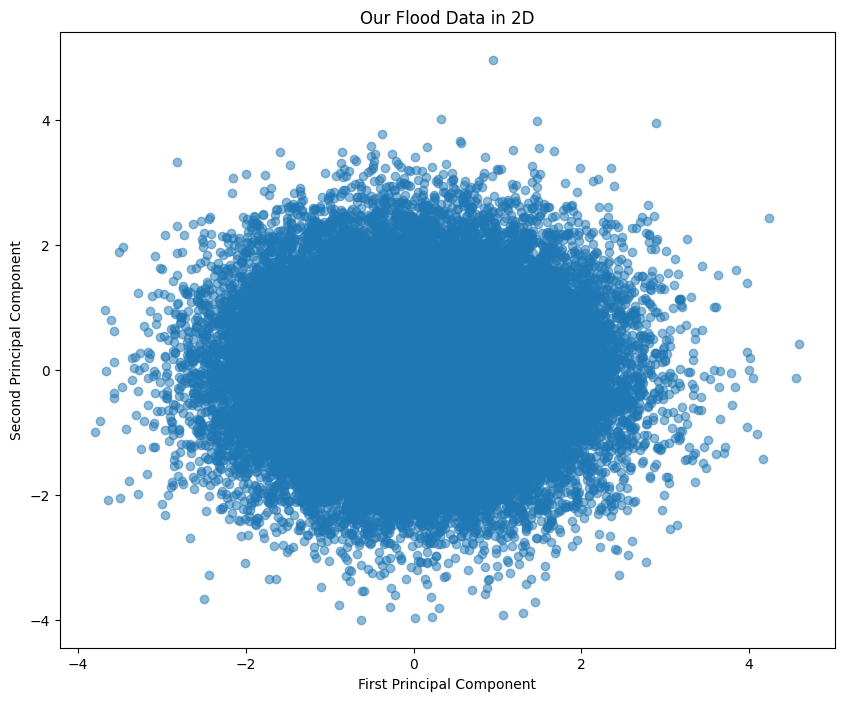

In [3]:
# Apply PCA to reduce our data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the data in 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Our Flood Data in 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# This plot shows us a simplified view of our data. Each point represents a location or scenario in our dataset.
# Points that are close together are similar in terms of their flood-related factors.
# We're looking to see if there are any natural groupings or patterns in this plot.

## Step 3: Finding Clusters with K-Means

Now we'll use a technique called K-Means clustering to identify groups in our data. These groups might represent different types of flood-prone areas.

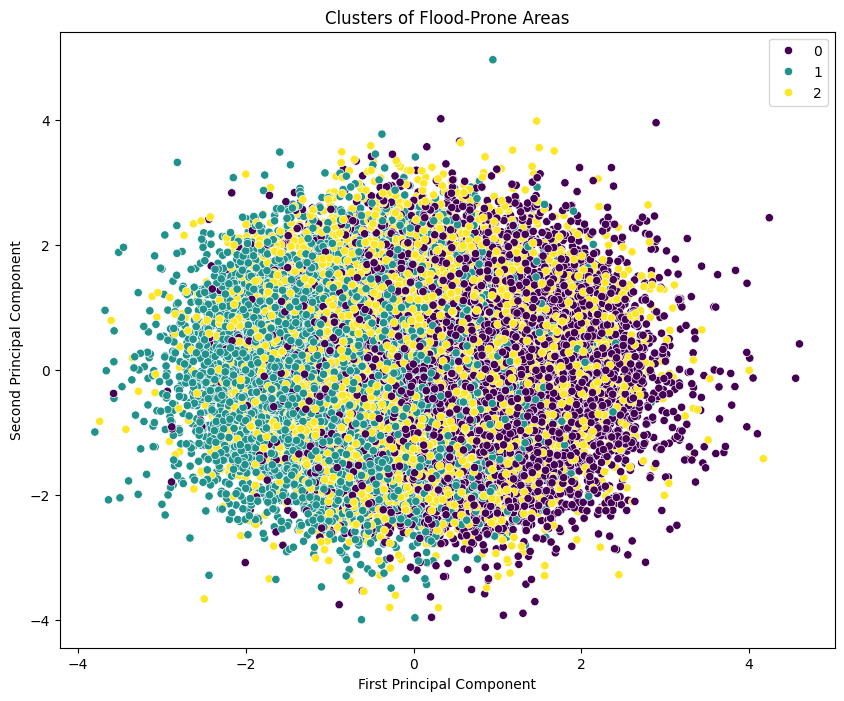

In [4]:
# Perform K-Means clustering
# We'll start by looking for 3 clusters, but this number can be adjusted
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to our original data
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clusters of Flood-Prone Areas')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# This plot shows us how our data points group together. Each color represents a different cluster.
# These clusters might represent different types of flood-prone areas with similar characteristics.

## Step 4: Analyzing Cluster Characteristics

Now that we've identified clusters, let's look at what makes each cluster unique. This can help us understand different types of flood-prone areas.

Average characteristics of each cluster:
         MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
Cluster                                                                         
0                5.442542            4.783616         5.080282       4.816102   
1                4.734056            4.964926         4.998214       5.040314   
2                4.755401            5.233701         4.961695       5.193590   

         Urbanization  ClimateChange  DamsQuality  Siltation  \
Cluster                                                        
0            6.318814       5.327175     5.364520   5.012429   
1            4.121062       4.758173     4.685405   4.875603   
2            4.411234       4.850842     4.974141   5.083769   

         AgriculturalPractices  Encroachments  ...  DrainageSystems  \
Cluster                                        ...                    
0                     5.071356       4.876667  ...         4.409492   
1                  

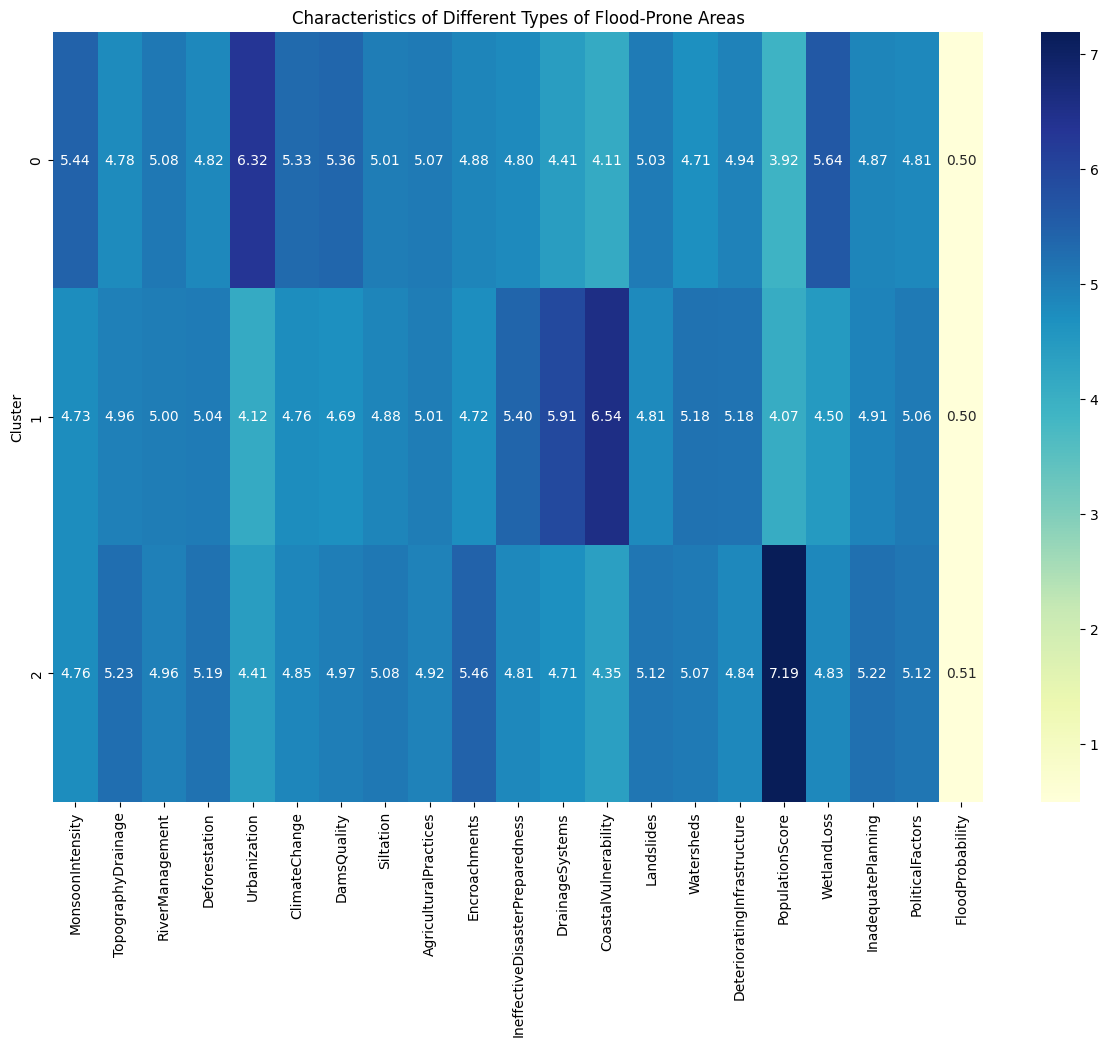

In [5]:
# Calculate mean values for each cluster
cluster_means = data.groupby('Cluster').mean()

# Display the characteristics of each cluster
print("Average characteristics of each cluster:")
print(cluster_means)

# Visualize the cluster characteristics
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Characteristics of Different Types of Flood-Prone Areas')
plt.show()

# This heatmap shows us the average values of each feature for each cluster.
# Darker colors indicate higher values. This helps us see what makes each cluster unique.

## Step 5: Interpreting Our Results

Let's try to interpret what these clusters might mean for flood risk assessment.

In [6]:
# Find the most distinctive features for each cluster
for cluster in cluster_means.index:
    print(f"\nCluster {cluster} is characterized by:")
    distinctive_features = cluster_means.loc[cluster].nlargest(3)
    for feature, value in distinctive_features.items():
        print(f"High {feature}: {value:.2f}")

# This gives us an idea of what defines each cluster. For example, one cluster might have high monsoon intensity,
# another might have poor drainage systems, and another might have high deforestation.
# These could represent different types of flood risks that require different prevention strategies.


Cluster 0 is characterized by:
High Urbanization: 6.32
High WetlandLoss: 5.64
High MonsoonIntensity: 5.44

Cluster 1 is characterized by:
High CoastalVulnerability: 6.54
High DrainageSystems: 5.91
High IneffectiveDisasterPreparedness: 5.40

Cluster 2 is characterized by:
High PopulationScore: 7.19
High Encroachments: 5.46
High TopographyDrainage: 5.23


## Conclusion

In this unsupervised learning approach, we've discovered patterns in our flood-related data without using the flood probability as a guide. This analysis can help us in several ways:

1. Identifying different types of flood-prone areas: Each cluster might represent a different type of area with its own flood risk profile.
2. Tailoring flood prevention strategies: Understanding the characteristics of each cluster can help develop targeted prevention measures.
3. Early warning systems: Areas that share characteristics with high-risk clusters could be monitored more closely.
4. Resource allocation: Efforts and resources for flood prevention could be distributed based on the needs of different area types.

Remember, this is an exploratory analysis. It gives us insights into the patterns in our data, but these insights should be combined with expert knowledge and further analysis to make practical decisions about flood risk management.